In [43]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt 
import numpy as np

from keras.models import Model
from keras import layers
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow

from glob import glob
from skimage.io import imread
from skimage.transform import resize

import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [6]:
training_data_dir = 'benignmalignant/train/'
testing_data_dir = 'benignmalignant/test/'
training_data_generator = ImageDataGenerator(
                              rescale = 1./255,   #normalize the image pixels values to be between 0 & 1
                              rotation_range = 40,
                              width_shift_range = 0.2,
                              height_shift_range = 0.2,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              fill_mode = 'nearest'
                             )
testing_data_generator = ImageDataGenerator(rescale = 1./255)
training_data = training_data_generator.flow_from_directory(
                                                            training_data_dir,
                                                            target_size = (150, 150),
                                                               batch_size = 32,
                                                            class_mode = 'binary'
                                                            )
testing_data = testing_data_generator.flow_from_directory(
                                                            testing_data_dir,
                                                            target_size = (150, 150),
                                                            batch_size = 32,
                                                            class_mode = 'binary'
                                                            )
training_data.class_indices

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

### Model Performance Function:

In [13]:
def model_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Model Accuracy')

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Model Loss')
    plt.show()

# Model 1:

In [7]:
model = tf.keras.Sequential([
                            Conv2D(64, (3, 3), input_shape = (150, 150, 3)),
                            BatchNormalization(),
                            MaxPool2D(2),
                            Conv2D(64, (3, 3)),
                            BatchNormalization(),
                            MaxPool2D(2),
                            Conv2D(128, (3, 3)),
                            BatchNormalization(),
                            MaxPool2D(2),
                            Conv2D(128, (3, 3), input_shape = (150, 150, 3)),
                            BatchNormalization(),
                            MaxPool2D(2),
                            Flatten(),
                            Dense(256, activation = 'relu'),
                            Dropout(rate = 0.2),
                             Dense(128, activation = 'relu'),
                            Dense(1, activation = 'sigmoid')
])


model.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [8]:
# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True, save_weights_only=True)
#hdf5 (Hierarchical Data Format) is to store the weights of the best performing epoch

In [50]:
import pydot

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [11]:
history = model.fit(training_data, epochs = 50 , validation_data = testing_data, callbacks = checkpoint)

Epoch 1/50
83/83 [==============================] - 145s 2s/step - loss: 0.5683 - accuracy: 0.7554 - val_loss: 0.7517 - val_accuracy: 0.5667
Epoch 2/50
83/83 [==============================] - 149s 2s/step - loss: 0.5378 - accuracy: 0.7713 - val_loss: 0.5852 - val_accuracy: 0.6333
Epoch 3/50
83/83 [==============================] - 145s 2s/step - loss: 0.4680 - accuracy: 0.7956 - val_loss: 0.6807 - val_accuracy: 0.6258
Epoch 4/50
83/83 [==============================] - 146s 2s/step - loss: 0.4417 - accuracy: 0.7918 - val_loss: 0.4183 - val_accuracy: 0.7788
Epoch 5/50
83/83 [==============================] - 145s 2s/step - loss: 0.4320 - accuracy: 0.8020 - val_loss: 0.4732 - val_accuracy: 0.7530
Epoch 6/50
83/83 [==============================] - 145s 2s/step - loss: 0.4278 - accuracy: 0.7964 - val_loss: 0.4658 - val_accuracy: 0.7803
Epoch 7/50
83/83 [==============================] - 145s 2s/step - loss: 0.4327 - accuracy: 0.7975 - val_loss: 0.5372 - val_accuracy: 0.7152
Epoch 8/50
83

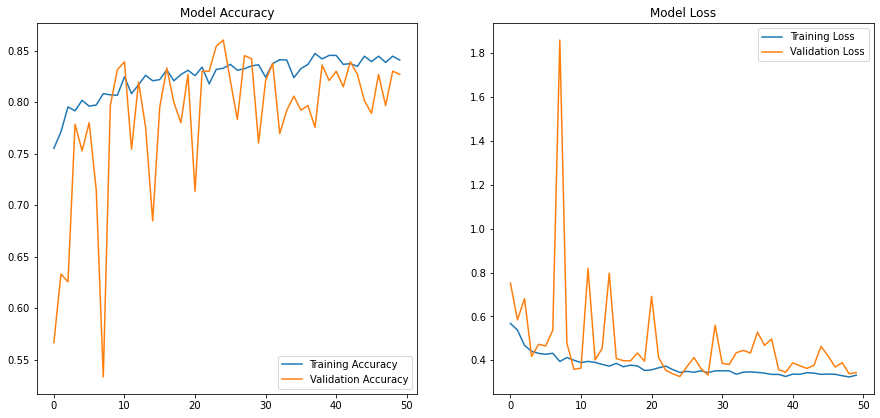

In [14]:
model_performance(history)

# Confusion Matrix

In [37]:
import cv2
main_directory = 'benignmalignant/'
img_dims = 150

In [ ]:
test_data = []
test_labels = []

for cond in ['/benign/', '/malignant/']:
    for img in (os.listdir(main_directory + 'test' + cond)):
        img = plt.imread(main_directory+'test'+cond+img)
        img = cv2.resize(img, (img_dims, img_dims))
        img = np.dstack([img, img, img])
        img = img.astype('float32') / 255
        if cond=='/benign/':
             label = 0
        elif cond=='/malignant/':
             label = 1
        test_data=np.append(test_data, img)
        test_labels=np.append(test_labels, label)
        
        test_data = np.array(test_data)
        test_labels = np.array(test_labels)

In [40]:
test_data

array([0.72549021, 0.57647061, 0.60000002, ..., 0.60000002, 0.49019608,
       0.47058824])

In [44]:
preds = model.predict(test_data)

accuracy = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()
#tp = true positive tn = true negative fp = false positive fn = false negative


print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train Accuracy: {}'.format(np.round((hist.history["accuracy"][-1])*100, 2)))

ValueError: in user code:

    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:191 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: [None, 1]
